# **Football Match Prediction Using Machine Learning**
Master's Thesis ÅAU 2023
<br>Fredrik Sjöberg

In [1]:
# Imports
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from numpy import array, random
import seaborn as sns
import pandas as pd

In [2]:
# Read data to Pandas dataframe
df = pd.read_csv('GraduDataFiles/bl1516_teamattrfifa2.csv')
df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTR,h_buildUpPlaySpeed,h_buildUpPlayDribbling,h_buildUpPlayPassing,h_chanceCreationPassing,h_chanceCreationCrossing,...,a_chanceCreationPassing,a_chanceCreationCrossing,a_chanceCreationShooting,a_defencePressure,a_defenceAggression,a_defenceTeamWidth,a_attack,a_midfield,a_defence,a_overall
0,0,14/08/15,Bayern Munich,Hamburg,H,45,24,28,37,31,...,62,58,47,44,41,49,76,74,74,75
1,1,15/08/15,Augsburg,Hertha,A,59,51,55,49,62,...,59,68,45,50,45,57,75,75,76,75
2,2,15/08/15,Darmstadt,Hannover,D,59,43,77,52,77,...,38,51,40,35,50,61,73,70,74,74
3,3,15/08/15,Dortmund,M'gladbach,H,71,37,40,70,44,...,38,26,49,41,48,39,77,78,75,78
4,4,15/08/15,Leverkusen,Hoffenheim,H,73,29,55,77,54,...,66,62,59,63,61,38,75,74,75,76


In [60]:
# Mixed data sets test
df1 = pd.read_csv('GraduDataFiles/bl1516_teamattrfifa2.csv')
df1 = df1.iloc[:, [2,3,6,7,9,11,15,16,19,20,22,24,28,29]]
df2 = pd.read_csv('GraduDataFiles/bl1516_playerattr.csv')
df = pd.merge(df2, df1, left_on=['HomeTeam', 'AwayTeam'], right_on=['HomeTeam', 'AwayTeam'], how='left')
df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTR,overall_rating,potential,crossing,finishing,heading_accuracy,...,h_chanceCreationCrossing,h_defencePressure,h_midfield,h_defence,a_buildUpPlayDribbling,a_buildUpPlayPassing,a_chanceCreationCrossing,a_defencePressure,a_midfield,a_defence
0,0,14/08/15,Bayern Munich,Hamburg,H,90,90,15,13,25,...,31.0,72.0,84.0,84.0,56.0,52.0,58.0,44.0,74.0,74.0
1,1,15/08/15,Dortmund,M'gladbach,H,80,84,15,8,17,...,44.0,65.0,81.0,81.0,53.0,32.0,26.0,41.0,78.0,75.0
2,2,15/08/15,Leverkusen,Hoffenheim,H,84,88,9,9,13,...,54.0,61.0,76.0,76.0,49.0,53.0,62.0,63.0,74.0,75.0
3,3,15/08/15,Augsburg,Hertha,A,75,76,12,27,18,...,62.0,34.0,74.0,73.0,44.0,55.0,68.0,50.0,75.0,76.0
4,4,15/08/15,Werder Bremen,Schalke 04,A,74,79,9,11,8,...,66.0,63.0,70.0,75.0,43.0,42.0,61.0,55.0,77.0,78.0


H    44.117647
A    32.679739
D    23.202614
Name: FTR, dtype: float64


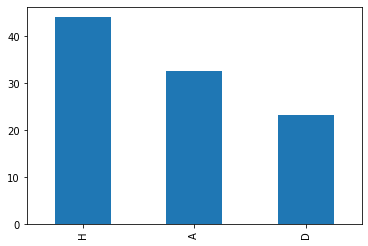

In [3]:
# Frequency distribution on the FTR attribute
a = df['FTR'].value_counts(normalize=True) * 100
a.plot(kind='bar')
print(a)
plt.show()

In [4]:
# Size of data set
rows = len(df.index)
columns = len(df.columns)
print(str(rows) + ' x ' + str(columns))

246 x 775


In [3]:
# Change data type
df['HomeTeam'] = df['HomeTeam'].astype(str)
df['AwayTeam'] = df['AwayTeam'].astype(str)
df['FTR'] = df['FTR'].astype(str)

# Encode labels in columns
label_encoder = preprocessing.LabelEncoder()
df['HomeTeam']= label_encoder.fit_transform(df['HomeTeam'])
df['AwayTeam']= label_encoder.fit_transform(df['AwayTeam'])

df.head()

,Unnamed: 0,Date,HomeTeam,AwayTeam,FTR,h_buildUpPlaySpeed,h_buildUpPlayDribbling,h_buildUpPlayPassing,h_chanceCreationPassing,h_chanceCreationCrossing,...,a_chanceCreationPassing,a_chanceCreationCrossing,a_chanceCreationShooting,a_defencePressure,a_defenceAggression,a_defenceTeamWidth,a_attack,a_midfield,a_defence,a_overall
0,0,14/08/15,1,6,H,45,24,28,37,31,...,62,58,47,44,41,49,76,74,74,75
1,1,15/08/15,0,8,A,59,51,55,49,62,...,59,68,45,50,45,57,75,75,76,75
2,2,15/08/15,2,7,D,59,43,77,52,77,...,38,51,40,35,50,61,73,70,74,74
3,3,15/08/15,3,12,H,71,37,40,70,44,...,38,26,49,41,48,39,77,78,75,78
4,4,15/08/15,11,9,H,73,29,55,77,54,...,66,62,59,63,61,38,75,74,75,76


In [63]:
# Remove null values from player attributes data set
#sum(df.apply(lambda x: sum(x.isnull().values), axis = 1)>0)
df = df.dropna(how='any',axis=0)
rows = len(df.index)
columns = len(df.columns)
print(str(rows) + ' x ' + str(columns))
df.reset_index(drop=True, inplace=True)

219 x 787


**Player Attributes Data Set**

In [20]:
# For player attributes
#df = df[df.columns.drop(list(df.filter(regex='gk')))]

#Divide dataset into train and test data
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=True)

Y_train = train_df['FTR']
X_train = train_df[train_df.columns[2:4].tolist() + train_df.columns[5:].tolist()]
#X_train = train_df[train_df.columns[5:].tolist()]

Y_test = test_df['FTR']
X_test = test_df[test_df.columns[2:4].tolist() + test_df.columns[5:].tolist()]
#X_test = test_df[test_df.columns[5:].tolist()]

X_train.head()

,HomeTeam,AwayTeam,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision.21,penalties.21,marking.21,standing_tackle.21,sliding_tackle.21,gk_diving.21,gk_handling.21,gk_kicking.21,gk_positioning.21,gk_reflexes.21
151,5,11,79,79,13,14,10,39,18,13,...,81,72,29,42,31,12,10,5,13,14
111,16,3,81,81,14,8,15,32,12,13,...,77,84,28,25,36,6,9,15,9,9
65,13,7,81,83,14,11,14,25,11,15,...,67,86,22,22,15,8,9,14,7,6
120,15,4,74,79,9,11,8,22,15,14,...,62,79,29,26,19,10,11,11,6,8
126,4,3,79,87,19,13,14,35,14,20,...,80,78,30,23,30,11,9,8,9,13


In [37]:
# Player attributes test, only overall ratings

df = df.loc[:, ['HomeTeam', 'AwayTeam', 'FTR', 'overall_rating', 'overall_rating.1', 'overall_rating.2', 'overall_rating.3', 'overall_rating.4', 'overall_rating.5', 'overall_rating.6', 'overall_rating.7', 'overall_rating.8', 'overall_rating.9', 'overall_rating.10', 'overall_rating.11', 'overall_rating.12', 'overall_rating.13', 'overall_rating.14', 'overall_rating.15', 'overall_rating.16', 'overall_rating.17', 'overall_rating.18', 'overall_rating.19', 'overall_rating.20', 'overall_rating.21']]
#df = df.loc[:, ['HomeTeam', 'AwayTeam', 'FTR', 'potential', 'potential.1', 'potential.2', 'potential.3', 'potential.4', 'potential.5', 'potential.6', 'potential.7', 'potential.8', 'potential.9', 'potential.10', 'potential.11', 'potential.12', 'potential.13', 'potential.14', 'potential.15', 'potential.16', 'potential.17', 'potential.18', 'potential.19', 'potential.20', 'potential.21']]
#df.head()

#Divide dataset into train and test data
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=True)

Y_train = train_df['FTR']
X_train = train_df[train_df.columns[0:2].tolist() + train_df.columns[3:].tolist()]

Y_test = test_df['FTR']
X_test = test_df[test_df.columns[0:2].tolist() + test_df.columns[3:].tolist()]

X_train.head()

,HomeTeam,AwayTeam,overall_rating,overall_rating.1,overall_rating.2,overall_rating.3,overall_rating.4,overall_rating.5,overall_rating.6,overall_rating.7,...,overall_rating.12,overall_rating.13,overall_rating.14,overall_rating.15,overall_rating.16,overall_rating.17,overall_rating.18,overall_rating.19,overall_rating.20,overall_rating.21
66,16,8,81,76,85,81.0,83,83,78,78,...,69,78,77.0,73.0,75,77,74,78,78,80
0,1,5,90,87,85,84.0,87,84,90,86,...,75,76,79.0,73.0,67,60,74,75,76,73
138,12,11,78,74,69,76.0,71,76,70,74,...,75,63,75.0,76.0,78,76,76,76,79,81
119,16,5,81,76,85,81.0,75,78,80,80,...,72,79,74.0,73.0,60,76,74,67,74,76
148,16,9,73,77,85,76.0,75,76,83,80,...,70,74,70.0,66.0,75,72,63,68,68,73


In [26]:
# Feature selection testing on player attributes
'''
X_train = X_train.drop(columns=['gk_diving.1', 'gk_diving.2', 'gk_diving.3', 'gk_diving.4', 'gk_diving.5', 'gk_diving.6', 'gk_diving.7', 'gk_diving.8', 'gk_diving.9', 'gk_diving.10', 'gk_diving.12', 'gk_diving.13', 'gk_diving.14', 'gk_diving.15', 'gk_diving.16', 'gk_diving.17', 'gk_diving.18', 'gk_diving.19', 'gk_diving.20', 'gk_diving.21'])
X_test = X_test.drop(columns=['gk_diving.1', 'gk_diving.2', 'gk_diving.3', 'gk_diving.4', 'gk_diving.5', 'gk_diving.6', 'gk_diving.7', 'gk_diving.8', 'gk_diving.9', 'gk_diving.10', 'gk_diving.12', 'gk_diving.13', 'gk_diving.14', 'gk_diving.15', 'gk_diving.16', 'gk_diving.17', 'gk_diving.18', 'gk_diving.19', 'gk_diving.20', 'gk_diving.21'])
X_train = X_train.drop(columns=['gk_handling.1', 'gk_handling.2', 'gk_handling.3', 'gk_handling.4', 'gk_handling.5', 'gk_handling.6', 'gk_handling.7', 'gk_handling.8', 'gk_handling.9', 'gk_handling.10', 'gk_handling.12', 'gk_handling.13', 'gk_handling.14', 'gk_handling.15', 'gk_handling.16', 'gk_handling.17', 'gk_handling.18', 'gk_handling.19', 'gk_handling.20', 'gk_handling.21'])
X_test = X_test.drop(columns=['gk_handling.1', 'gk_handling.2', 'gk_handling.3', 'gk_handling.4', 'gk_handling.5', 'gk_handling.6', 'gk_handling.7', 'gk_handling.8', 'gk_handling.9', 'gk_handling.10', 'gk_handling.12', 'gk_handling.13', 'gk_handling.14', 'gk_handling.15', 'gk_handling.16', 'gk_handling.17', 'gk_handling.18', 'gk_handling.19', 'gk_handling.20', 'gk_handling.21'])
X_train = X_train.drop(columns=['gk_positioning.1', 'gk_positioning.2', 'gk_positioning.3', 'gk_positioning.4', 'gk_positioning.5', 'gk_positioning.6', 'gk_positioning.7', 'gk_positioning.8', 'gk_positioning.9', 'gk_positioning.10', 'gk_positioning.12', 'gk_positioning.13', 'gk_positioning.14', 'gk_positioning.15', 'gk_positioning.16', 'gk_positioning.17', 'gk_positioning.18', 'gk_positioning.19', 'gk_positioning.20', 'gk_positioning.21'])
X_test = X_test.drop(columns=['gk_positioning.1', 'gk_positioning.2', 'gk_positioning.3', 'gk_positioning.4', 'gk_positioning.5', 'gk_positioning.6', 'gk_positioning.7', 'gk_positioning.8', 'gk_positioning.9', 'gk_positioning.10', 'gk_positioning.12', 'gk_positioning.13', 'gk_positioning.14', 'gk_positioning.15', 'gk_positioning.16', 'gk_positioning.17', 'gk_positioning.18', 'gk_positioning.19', 'gk_positioning.20', 'gk_positioning.21'])
X_train = X_train.drop(columns=['gk_kicking.1', 'gk_kicking.2', 'gk_kicking.3', 'gk_kicking.4', 'gk_kicking.5', 'gk_kicking.6', 'gk_kicking.7', 'gk_kicking.8', 'gk_kicking.9', 'gk_kicking.10', 'gk_kicking.12', 'gk_kicking.13', 'gk_kicking.14', 'gk_kicking.15', 'gk_kicking.16', 'gk_kicking.17', 'gk_kicking.18', 'gk_kicking.19', 'gk_kicking.20', 'gk_kicking.21'])
X_test = X_test.drop(columns=['gk_kicking.1', 'gk_kicking.2', 'gk_kicking.3', 'gk_kicking.4', 'gk_kicking.5', 'gk_kicking.6', 'gk_kicking.7', 'gk_kicking.8', 'gk_kicking.9', 'gk_kicking.10', 'gk_kicking.12', 'gk_kicking.13', 'gk_kicking.14', 'gk_kicking.15', 'gk_kicking.16', 'gk_kicking.17', 'gk_kicking.18', 'gk_kicking.19', 'gk_kicking.20', 'gk_kicking.21'])
X_train = X_train.drop(columns=['gk_reflexes.1', 'gk_reflexes.2', 'gk_reflexes.3', 'gk_reflexes.4', 'gk_reflexes.5', 'gk_reflexes.6', 'gk_reflexes.7', 'gk_reflexes.8', 'gk_reflexes.9', 'gk_reflexes.10', 'gk_reflexes.12', 'gk_reflexes.13', 'gk_reflexes.14', 'gk_reflexes.15', 'gk_reflexes.16', 'gk_reflexes.17', 'gk_reflexes.18', 'gk_reflexes.19', 'gk_reflexes.20', 'gk_reflexes.21'])
X_test = X_test.drop(columns=['gk_reflexes.1', 'gk_reflexes.2', 'gk_reflexes.3', 'gk_reflexes.4', 'gk_reflexes.5', 'gk_reflexes.6', 'gk_reflexes.7', 'gk_reflexes.8', 'gk_reflexes.9', 'gk_reflexes.10', 'gk_reflexes.12', 'gk_reflexes.13', 'gk_reflexes.14', 'gk_reflexes.15', 'gk_reflexes.16', 'gk_reflexes.17', 'gk_reflexes.18', 'gk_reflexes.19', 'gk_reflexes.20', 'gk_reflexes.21'])
'''

def dfdrop(a, X_train, X_test):
    X_train = X_train[X_train.columns.drop(list(X_train.filter(regex=a)))]
    X_test = X_test[X_test.columns.drop(list(X_test.filter(regex=a)))]
    return X_train, X_test

X_train, X_test = dfdrop('HomeTeam', X_train, X_test)
X_train, X_test = dfdrop('standing_tackle', X_train, X_test)
X_train, X_test = dfdrop('sliding_tackle', X_train, X_test)
X_train, X_test = dfdrop('free_kick_accuracy', X_train, X_test)
X_train, X_test = dfdrop('penalties', X_train, X_test)
X_train, X_test = dfdrop('heading_accuracy', X_train, X_test)
X_train, X_test = dfdrop('stamina', X_train, X_test)
X_train, X_test = dfdrop('gk_positioning', X_train, X_test)
X_train, X_test = dfdrop('gk_handling', X_train, X_test)
X_train, X_test = dfdrop('gk_kicking', X_train, X_test)
X_train, X_test = dfdrop('gk_diving', X_train, X_test)
X_train, X_test = dfdrop('gk_reflexes', X_train, X_test)
X_train, X_test = dfdrop('AwayTeam', X_train, X_test)
X_train, X_test = dfdrop('interceptions', X_train, X_test)
X_train, X_test = dfdrop('long_shots', X_train, X_test)
X_train, X_test = dfdrop('marking', X_train, X_test)
X_train, X_test = dfdrop('aggression', X_train, X_test)
X_train, X_test = dfdrop('shot_power', X_train, X_test)

X_train, X_test = dfdrop('.11', X_train, X_test)
X_train = X_train[X_train.columns[0:1].tolist() + X_train.columns[23:].tolist()]
X_test = X_test[X_test.columns[0:1].tolist() + X_test.columns[23:].tolist()]

X_train.head()

,overall_rating,short_passing.1,volleys.1,dribbling.1,curve.1,long_passing.1,ball_control.1,acceleration.1,sprint_speed.1,agility.1,...,ball_control.21,acceleration.21,sprint_speed.21,agility.21,reactions.21,balance.21,jumping.21,strength.21,positioning.21,vision.21
151,79,74,39,69,73,69,72,77,75,78,...,83,77,72,84,83,83,71,63,82,81
111,81,79,65,87,74,67,84,84,76,86,...,79,96,95,80,83,66,76,77,84,77
65,81,74,38,60,38,64,70,63,67,65,...,85,78,77,76,74,72,76,70,79,67
120,74,75,49,75,52,71,76,78,77,76,...,75,73,78,65,78,56,80,84,82,62
126,79,72,56,73,53,59,74,85,86,72,...,84,87,74,93,83,92,67,39,80,80


**Team Attributes Data Set**

In [29]:
# For team attributes
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=True)

Y_train = train_df['FTR']
#X_train = train_df[train_df.columns[2:4].tolist() + train_df.columns[5:].tolist()] #fifa all 28
#X_train = train_df[train_df.columns[5:].tolist()]
#X_train = train_df.iloc[:, [2,3,14,15,16,17,27,28,29,30]]
#X_train = train_df.iloc[:, [2,3,6,7,9,11,14,15,16,17,19,20,22,24,27,28,29,30]] #fifa 18
#X_train = train_df.iloc[:, [2,3,7,9,14,19,28,30,35,40]] #10 without fifa
#X_train = train_df.iloc[:, [2,3,5,7,9,12,14,16,19,21,23,26,28,30,33,35,37,40,42,44]] #all without fifa
#X_train = train_df.iloc[:, [6,7,9,11,15,16,19,20,22,24,28,29]] #4+mid+def
X_train = train_df.iloc[:, [6,7,9,11,15,16,19,20,22,24,28,29]]

Y_test = test_df['FTR']
#X_test = test_df[test_df.columns[2:4].tolist() + test_df.columns[5:].tolist()] #fifa all 28
#X_test = test_df[test_df.columns[5:].tolist()]
#X_test = test_df.iloc[:, [2,3,14,15,16,17,27,28,29,30]]
#X_test = test_df.iloc[:, [2,3,6,7,9,11,14,15,16,17,19,20,22,24,27,28,29,30]] #fifa 18
#X_test = test_df.iloc[:, [2,3,7,9,14,19,28,30,35,40]] #10 without fifa
#X_test = test_df.iloc[:, [2,3,5,7,9,12,14,16,19,21,23,26,28,30,33,35,37,40,42,44]] #all without fifa
#X_test = test_df.iloc[:, [6,7,9,11,15,16,19,20,22,24,28,29]] #4+mid+def
X_test = test_df.iloc[:, [6,7,9,11,15,16,19,20,22,24,28,29]]

X_train.head()

,h_buildUpPlayDribbling,h_buildUpPlayPassing,h_chanceCreationCrossing,h_defencePressure,h_midfield,h_defence,a_buildUpPlayDribbling,a_buildUpPlayPassing,a_chanceCreationCrossing,a_defencePressure,a_midfield,a_defence
214,53,32,26,41,78,75,55,41,66,41,76,74
112,43,42,61,55,77,78,24,28,31,72,84,84
182,37,40,44,65,81,81,55,41,51,35,70,74
249,43,53,40,55,75,74,51,55,62,34,74,73
154,47,65,36,42,73,74,55,41,66,41,76,74


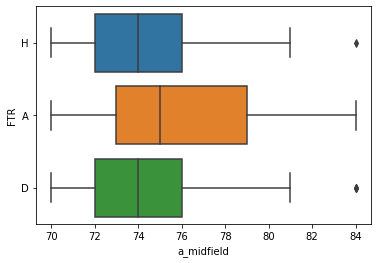

In [7]:
# Boxplot test
#sns.boxplot(x="a_midfield", y='FTR', data=df, )
#sns.histplot(x='a_midfield', data=df, )
sns.boxplot(x="a_midfield", y='FTR', data=df, )

plt.show()

**Match Statistics Data Set**

In [81]:
# For match statistics
train_df, test_df = train_test_split(df, test_size=0.3, shuffle=False)

Y_train = train_df['FTR']
#X_train = train_df[train_df.columns[2:6].tolist() + train_df.columns[7:].tolist()] #all
#X_train = train_df[train_df.columns[4:6].tolist() + train_df.columns[7:17].tolist() + train_df.columns[19:].tolist()] #team,red
#X_train = train_df.iloc[:, [4,5,7,8,9,10,11,12,15,16,19,20,21,22]] #corners removed
#X_train = train_df.iloc[:, [4,5,7,8,9,10,11,12,15,16]]
X_train = train_df[train_df.columns[2:6].tolist() + train_df.columns[7:].tolist()]

Y_test = test_df['FTR']
#X_test = test_df[test_df.columns[2:6].tolist() + test_df.columns[7:].tolist()] #all
#X_test = test_df[test_df.columns[4:6].tolist() + test_df.columns[7:17].tolist() + test_df.columns[19:].tolist()] #team,red
#X_test = test_df.iloc[:, [4,5,7,8,9,10,11,12,15,16,19,20,21,22]]  #corners removed
#X_test = test_df.iloc[:, [4,5,7,8,9,10,11,12,15,16]]
X_test = test_df[test_df.columns[2:6].tolist() + test_df.columns[7:].tolist()]

X_train.head()

,HomeTeam,AwayTeam,FTHG,FTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,FTHCG,FTACG,HForm,AForm
0,1,6,2.0,2.0,20.0,10.0,0.0,0.0,11.0,15.0,5.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,2.0
1,0,8,3.0,1.0,15.0,4.0,0.0,0.0,17.0,18.0,6.0,2.0,2.0,2.0,0.0,0.0,1.0,2.0,2.0,0.0
2,2,7,1.0,2.0,18.0,11.0,2.0,0.0,17.0,17.0,10.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,2.0,2.0
3,3,12,3.0,1.0,23.0,10.0,0.0,0.0,10.0,13.0,9.0,1.0,0.0,4.0,0.0,1.0,2.0,3.0,2.0,0.0
4,11,9,1.0,2.0,18.0,16.0,0.0,0.0,14.0,14.0,8.0,1.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,2.0


**K-fold cross-validation**

In [23]:
# K-fold cross-validation
#y = df['FTR']
#x = df[df.columns[2:6].tolist() + df.columns[7:].tolist()]

#clf = CategoricalNB()
#clf = GaussianNB()
#clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
clf = LogisticRegression(random_state = 0, multi_class='ovr')
k_folds = KFold(n_splits = 10)
scores = cross_val_score(clf, X_train, Y_train, cv = k_folds)
#scores = cross_val_score(clf, x, y, cv = k_folds)

print("Cross Validation Scores: ", scores)
print("Average CV Score: ", scores.mean())
print("Number of CV Scores used in Average: ", len(scores))

C:\Users\fredr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\fredr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Cross Validation Scores:  [0.45454545 0.54545455 0.54545455 0.5        0.71428571 0.52380952
 0.38095238 0.42857143 0.52380952 0.61904762]
Average CV Score:  0.5235930735930735
Number of CV Scores used in Average:  10


C:\Users\fredr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


**Naive Bayes**

In [30]:
#Train and predict
#clf = GaussianNB()
#clf = CategoricalNB(min_categories=Y_test.nunique())
clf = CategoricalNB()
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
#pred_prob

              precision    recall  f1-score   support

           A       0.34      0.58      0.43        24
           D       0.10      0.05      0.06        21
           H       0.61      0.53      0.57        47

    accuracy                           0.43        92
   macro avg       0.35      0.39      0.35        92
weighted avg       0.42      0.43      0.42        92

0.43478260869565216


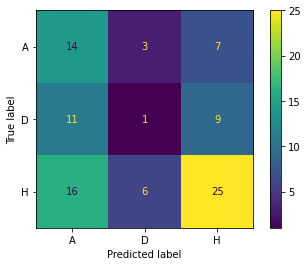

In [31]:
#Accuracy and heatmap
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test, pred))

labels = ['A', 'D', 'H']
cf_matrix = confusion_matrix(Y_test, pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
cmd.plot()

              precision    recall  f1-score   support

           A       0.61      0.67      0.64        76
           D       0.53      0.20      0.29        50
           H       0.61      0.77      0.68        88

    accuracy                           0.60       214
   macro avg       0.58      0.55      0.54       214
weighted avg       0.59      0.60      0.58       214

0.602803738317757


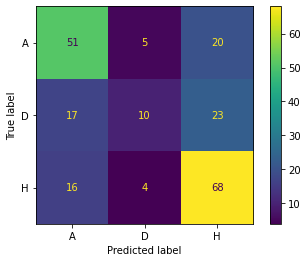

In [35]:
# Training Accuracy
train_pred = clf.predict(X_train)

print(classification_report(Y_train,train_pred))
print(accuracy_score(Y_train, train_pred))

labels = ['A', 'D', 'H']
cf_matrix = confusion_matrix(Y_train, train_pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
cmd.plot()

**Logistic Regression**

In [235]:
# Feature scaling
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train) 
X_test = sc_x.transform(X_test)
#print (X_train[0:10, :])

In [238]:
# Weights
weights = {'H':23, 'A':35, 'D':42}

In [33]:
#Train and predict
#clf = LogisticRegression(class_weight = weights, random_state = 0, multi_class='ovr')
clf = LogisticRegression(random_state = 0, multi_class='ovr')
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)
#pred_prob

C:\Users\fredr\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           A       0.35      0.71      0.47        24
           D       0.33      0.10      0.15        21
           H       0.71      0.57      0.64        47

    accuracy                           0.50        92
   macro avg       0.47      0.46      0.42        92
weighted avg       0.53      0.50      0.48        92

0.5


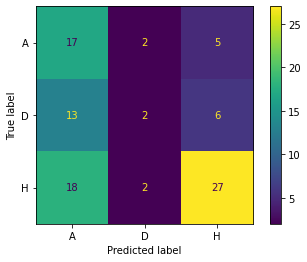

In [34]:
#Accuracy and heatmap
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test, pred))

labels = ['A', 'D', 'H']
cf_matrix = confusion_matrix(Y_test, pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
cmd.plot()

In [42]:
clf.score(X_train, Y_train)

1.0

**Random Forest**

In [9]:
#Train and predict
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)
clf.fit(X_train, Y_train)
pred = clf.predict(X_test)
#pred_prob = clf.predict_proba(X_test)
#pred_prob
pred

array(['H', 'H', 'D', 'A', 'A', 'H', 'H', 'D', 'H', 'H', 'A', 'A', 'H',
       'D', 'H', 'A', 'H', 'H', 'H', 'H', 'D', 'D', 'A', 'H', 'D', 'D',
       'H', 'H', 'H', 'H', 'H', 'A', 'H', 'D', 'D', 'H', 'D', 'D', 'H',
       'H', 'D', 'H', 'A', 'A', 'H', 'H', 'H', 'A', 'H', 'H', 'D', 'H',
       'H', 'H', 'A', 'H', 'A', 'H', 'H', 'A', 'H', 'D', 'A', 'A', 'H',
       'A', 'A', 'A', 'A', 'A', 'H', 'A', 'A', 'A', 'H', 'D', 'D', 'A',
       'D', 'H', 'H', 'H', 'H', 'H', 'H', 'D', 'A', 'H', 'H', 'H', 'H',
       'H'], dtype=object)

              precision    recall  f1-score   support

           A       0.44      0.34      0.39        32
           D       0.22      0.19      0.21        21
           H       0.55      0.69      0.61        39

    accuracy                           0.46        92
   macro avg       0.40      0.41      0.40        92
weighted avg       0.44      0.46      0.44        92

0.45652173913043476


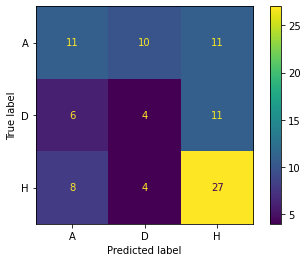

In [10]:
#Accuracy and heatmap
print(classification_report(Y_test,pred))
print(accuracy_score(Y_test, pred))

labels = ['A', 'D', 'H']
cf_matrix = confusion_matrix(Y_test, pred)
cmd = ConfusionMatrixDisplay(cf_matrix, display_labels=labels)
cmd.plot()

In [11]:
# Feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

a_buildUpPlayDribbling      0.101288
h_buildUpPlayDribbling      0.092643
a_buildUpPlayPassing        0.091227
a_midfield                  0.088243
a_chanceCreationCrossing    0.087401
h_midfield                  0.083121
a_defence                   0.082052
a_defencePressure           0.080155
h_defencePressure           0.077929
h_defence                   0.077252
h_buildUpPlayPassing        0.075848
h_chanceCreationCrossing    0.062841
dtype: float64

In [38]:
# Highest feature scores
feature_scores = feature_scores[feature_scores > 0.005]
feature_scores

potential.1        0.006579
balance.8          0.006565
AwayTeam           0.006470
acceleration.18    0.006166
positioning.7      0.005654
aggression.10      0.005049
dtype: float64

In [32]:
# Player attributes feature score averages
test = {
    'overall_rating':    feature_scores.filter(regex='overall_rating').mean(),
    'potential':    feature_scores.filter(regex='potential').mean(),
    'crossing':    feature_scores.filter(regex='crossing').mean(),
    'finishing':    feature_scores.filter(regex='finishing').mean(),
    'heading_accuracy':    feature_scores.filter(regex='heading_accuracy').mean(),
    'short_passing':    feature_scores.filter(regex='short_passing').mean(),
    'volleys':    feature_scores.filter(regex='volleys').mean(),
    'dribbling':    feature_scores.filter(regex='dribbling').mean(),
    'curve':    feature_scores.filter(regex='curve').mean(),
    'free_kick_accuracy':    feature_scores.filter(regex='free_kick_accuracy').mean(),
    'long_passing':    feature_scores.filter(regex='long_passing').mean(),
    'ball_control':    feature_scores.filter(regex='ball_control').mean(),
    'acceleration':    feature_scores.filter(regex='acceleration').mean(),
    'sprint_speed':    feature_scores.filter(regex='sprint_speed').mean(),
    'agility':    feature_scores.filter(regex='agility').mean(),
    'reactions':    feature_scores.filter(regex='reactions').mean(),
    'balance':    feature_scores.filter(regex='balance').mean(),
    'shot_power':    feature_scores.filter(regex='shot_power').mean(),
    'jumping':    feature_scores.filter(regex='jumping').mean(),
    'stamina':    feature_scores.filter(regex='stamina').mean(),
    'strength':    feature_scores.filter(regex='strength').mean(),
    'long_shots':    feature_scores.filter(regex='long_shots').mean(),
    'aggression':    feature_scores.filter(regex='aggression').mean(),
    'interceptions':    feature_scores.filter(regex='interceptions').mean(),
    'positioning':    feature_scores.filter(regex='positioning').mean(),
    'vision':    feature_scores.filter(regex='vision').mean(),
    'penalties':    feature_scores.filter(regex='penalties').mean(),
    'marking':    feature_scores.filter(regex='marking').mean(),
    'standing_tackle':    feature_scores.filter(regex='standing_tackle').mean(),
    'sliding_tackle':    feature_scores.filter(regex='sliding_tackle').mean(),
    'gk_diving':    feature_scores.filter(regex='gk_diving').mean(),
    'gk_handling':    feature_scores.filter(regex='gk_handling').mean(),
    'gk_positioning':    feature_scores.filter(regex='gk_positioning').mean(),
    'gk_reflexes':    feature_scores.filter(regex='gk_reflexes').mean(),
    'gk_kicking':    feature_scores.filter(regex='gk_kicking').mean(),
    'AwayTeam':    feature_scores.filter(regex='AwayTeam').mean(),
    'HomeTeam':    feature_scores.filter(regex='HomeTeam').mean()
}

s = pd.Series(test).sort_values(ascending=False)
s

overall_rating        0.003283
volleys               0.003197
crossing              0.003083
dribbling             0.002968
positioning           0.002869
jumping               0.002858
reactions             0.002819
curve                 0.002694
vision                0.002616
finishing             0.002608
strength              0.002492
acceleration          0.002478
balance               0.002475
agility               0.002471
sprint_speed          0.002447
long_passing          0.002381
potential             0.002377
short_passing         0.002188
ball_control          0.002098
heading_accuracy           NaN
free_kick_accuracy         NaN
shot_power                 NaN
stamina                    NaN
long_shots                 NaN
aggression                 NaN
interceptions              NaN
penalties                  NaN
marking                    NaN
standing_tackle            NaN
sliding_tackle             NaN
gk_diving                  NaN
gk_handling                NaN
gk_posit

In [241]:
test = {
    'overall_rating':    feature_scores.filter(regex='overall_rating').mean(),
    'potential':    feature_scores.filter(regex='potential').mean(),
    'crossing':    feature_scores.filter(regex='crossing').mean(),
    'finishing':    feature_scores.filter(regex='finishing').mean(),
    'short_passing':    feature_scores.filter(regex='short_passing').mean(),
    'volleys':    feature_scores.filter(regex='volleys').mean(),
    'dribbling':    feature_scores.filter(regex='dribbling').mean(),
    'curve':    feature_scores.filter(regex='curve').mean(),
    'long_passing':    feature_scores.filter(regex='long_passing').mean(),
    'ball_control':    feature_scores.filter(regex='ball_control').mean(),
    'acceleration':    feature_scores.filter(regex='acceleration').mean(),
    'sprint_speed':    feature_scores.filter(regex='sprint_speed').mean(),
    'agility':    feature_scores.filter(regex='agility').mean(),
    'reactions':    feature_scores.filter(regex='reactions').mean(),
    'balance':    feature_scores.filter(regex='balance').mean(),
    'jumping':    feature_scores.filter(regex='jumping').mean(),
    'strength':    feature_scores.filter(regex='strength').mean(),
    'positioning':    feature_scores.filter(regex='positioning').mean(),
    'vision':    feature_scores.filter(regex='vision').mean()
}

s = pd.Series(test).sort_values(ascending=False)
s

balance           0.003438
acceleration      0.003420
positioning       0.003328
agility           0.003059
volleys           0.002974
jumping           0.002965
finishing         0.002867
strength          0.002792
dribbling         0.002772
curve             0.002723
long_passing      0.002714
potential         0.002704
overall_rating    0.002670
crossing          0.002571
sprint_speed      0.002527
ball_control      0.002488
reactions         0.002459
vision            0.002244
short_passing     0.002132
dtype: float64

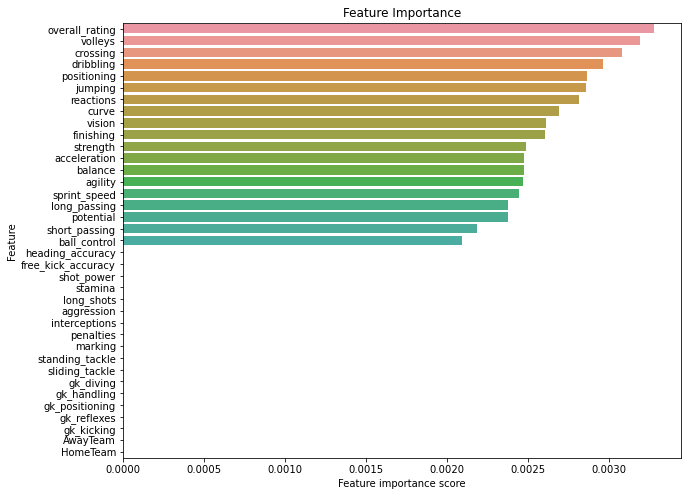

In [33]:
# Feature importance bar plot
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=s, y=s.index)
ax.set_title("Feature Importance")
ax.set_yticklabels(s.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Feature")
plt.show()

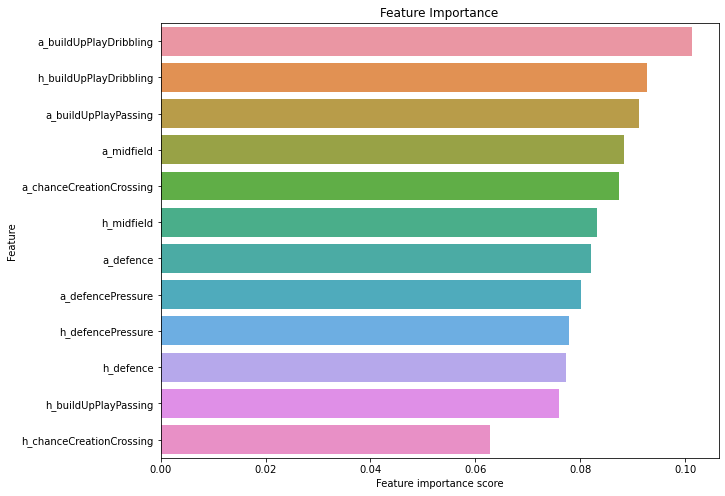

In [12]:
# Feature importance bar plot
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Feature Importance")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Feature")
plt.show()